In [21]:
# Exploratory Data Analysis (EDA):

# Perform exploratory data analysis to understand the structure of the dataset
import pandas as pd

# Assuming the dataset is in a CSV file named 'your_dataset.csv'
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_excel('glass-14.xlsx') 

# Display the first few rows of the dataset
print(df.head())

# Get basic information about the dataset
print(df.info())

# Describe the numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Analyze the distribution of categorical features
for col in df.select_dtypes(include=['object']).columns:
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())

  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes
None
       Prepare a model for glass classification using Random Forest
count                                                  18          
unique                                                 18       

Missing values per column:
 Prepare a model for glass classification using Random Forest    1
dtype: int64


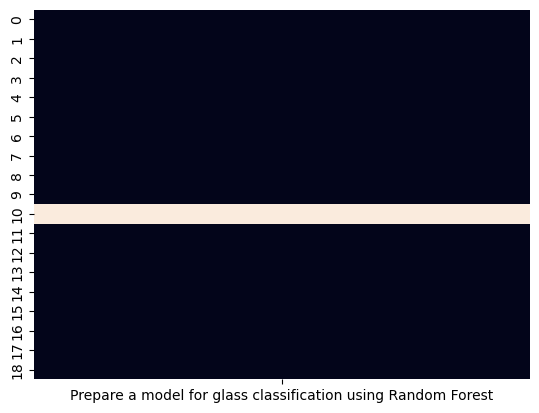

No numerical columns available for box plots.
No numerical columns available for outlier detection.

Value counts for Prepare a model for glass classification using Random Forest:
Data Description:                                                                               1
RI : refractive index                                                                           1
 6 --tableware                                                                                  1
 5 --containers                                                                                 1
 4 --vehicle_windows_non_float_processed (none in this database)                                1
 3 --vehicle_windows_float_processed                                                            1
 2 --building_windows_non_float_processed                                                       1
1 -- building_windows_float_processed                                                           1
Type: Type of glass: (class attribut

In [22]:
# Check for missing values, outliers, inconsistencies in the data.
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('glass-14.xlsx') 

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Handle missing values (e.g., imputation or removal)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detect outliers using box plots
numerical_columns = df.select_dtypes(include=np.number).columns
if len(numerical_columns) > 0:
    for col in numerical_columns:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()
else:
    print("No numerical columns available for box plots.")

# Identify outliers using IQR (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Handle cases where there are no numerical columns
if len(numerical_columns) > 0:
    # Replace 'RI' with an actual numerical column name from the list
    numerical_column = numerical_columns[0]  # Select the first numerical column as an example
    outliers = detect_outliers_iqr(df[numerical_column])
    print(f"Outliers in '{numerical_column}': {outliers}")
else:
    print("No numerical columns available for outlier detection.")

# Check for inconsistencies in categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns available for value counts.")


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('glass-14.xlsx') 

# Print the data types to ensure numerical columns are present
print(df.dtypes)

# Check for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns in DataFrame:", numerical_cols)

# Histograms (only for numerical columns)
if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(10, 8))
    plt.show()
else:
    print("No numerical columns to plot histograms.")

# Box plots (only for numerical columns)
if len(numerical_cols) > 0:
    df.boxplot(figsize=(10, 8))
    plt.show()
else:
    print("No numerical columns to plot box plots.")

# Pair plots (for numerical features)
# Make sure to replace 'numerical_feature1', 'numerical_feature2', 'numerical_feature3'
# with actual numerical column names
if len(numerical_cols) >= 3:
    sns.pairplot(df[numerical_cols[:3]])  # Use the first 3 numerical columns as an example
    plt.show()
else:
    print("Not enough numerical columns for pair plots.")

# Correlation matrix heatmap
if len(numerical_cols) > 0:
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()
else:
    print("No numerical columns to plot the correlation matrix heatmap.")

# Scatter plots (for relationships between two features)
# Replace 'feature1' and 'feature2' with actual column names
if 'feature1' in df.columns and 'feature2' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['feature1'], df['feature2'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter Plot of Feature 1 vs Feature 2')
    plt.show()
else:
    print("One or both of 'feature1' and 'feature2' are not in the DataFrame.")


Prepare a model for glass classification using Random Forest    object
dtype: object
Numerical columns in DataFrame: Index([], dtype='object')
No numerical columns to plot histograms.
No numerical columns to plot box plots.
Not enough numerical columns for pair plots.
No numerical columns to plot the correlation matrix heatmap.
One or both of 'feature1' and 'feature2' are not in the DataFrame.


In [24]:
# Data Preprocessing

#  Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('glass-14.xlsx') 

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Strategy for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # Impute missing values with the median
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputed missing values in '{col}' with median value {median_value}")

# Strategy for Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Impute missing values with the mode
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in '{col}' with mode value '{mode_value}'")

# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values per column:\n", remaining_missing_values)


Missing values per column:
 Prepare a model for glass classification using Random Forest    1
dtype: int64
Imputed missing values in 'Prepare a model for glass classification using Random Forest' with mode value ' 2 --building_windows_non_float_processed'
Remaining missing values per column:
 Prepare a model for glass classification using Random Forest    0
dtype: int64


In [25]:
# If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
# Apply one-hot encoding to categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols)
    print("DataFrame after one-hot encoding:")
    print(df.head())
else:
    print("No categorical columns found for one-hot encoding.")



DataFrame after one-hot encoding:
   Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed  \
0                                                  0                                                        
1                                                  0                                                        
2                                                  0                                                        
3                                                  0                                                        
4                                                  0                                                        

   Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed  \
0                                                  0                                                   
1                                                  0                                                   

In [26]:
# Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Check the column names to find the correct target variable name
print("Columns in DataFrame:", df.columns)

# Replace 'target_variable' with the actual name of your target column
target_variable = 'target'  # Replace with your actual target column name

if target_variable not in df.columns:
    raise ValueError(f"Column '{target_variable}' not found in DataFrame")

# Prepare features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply normalization (comment out if not needed)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# The resampled training data is now available in X_train_resampled and y_train_resampled



Columns in DataFrame: Index(['Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed',
       'Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_ 4 --vehicle_windows_non_float_processed (none in this database)',
       'Prepare a model for glass classification using Random Forest_ 5 --containers',
       'Prepare a model for glass classification using Random Forest_ 6 --tableware',
       'Prepare a model for glass classification using Random Forest_ 7 --headlamps',
       'Prepare a model for glass classification using Random Forest_1 -- building_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_AI: Aluminum',
       'Prepare a model for glass classification using Random Forest_Ba: Barium',
       'Prepare a model for glass classification using Random Forest_Ca: Calcium',
    

ValueError: Column 'target' not found in DataFrame

Missing values per column:
 Prepare a model for glass classification using Random Forest    1
dtype: int64


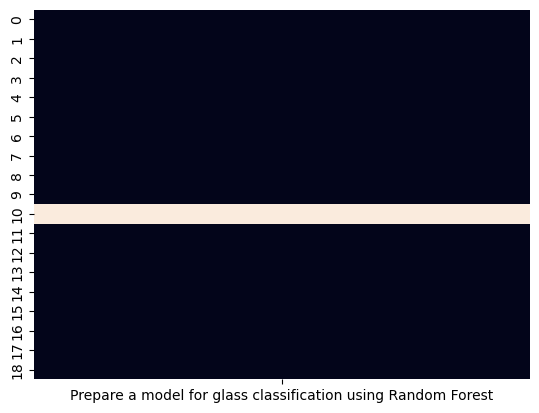

Columns in DataFrame: Index(['Prepare a model for glass classification using Random Forest'], dtype='object')
Numerical columns in DataFrame: Index([], dtype='object')
Column 'RI' not found in the DataFrame.

Value counts for Prepare a model for glass classification using Random Forest:
Data Description:                                                                               1
RI : refractive index                                                                           1
 6 --tableware                                                                                  1
 5 --containers                                                                                 1
 4 --vehicle_windows_non_float_processed (none in this database)                                1
 3 --vehicle_windows_float_processed                                                            1
 2 --building_windows_non_float_processed                                                       1
1 -- building_windows_floa

ValueError: Column 'target_variable' not found in DataFrame

In [27]:
# Random Forest Model Implementation
# Divide the data into train and test split
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_excel('glass-14.xlsx')

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Handle missing values (e.g., imputation or removal)
df.fillna(df.mean(), inplace=True)

# Print the column names to identify numerical columns
print("Columns in DataFrame:", df.columns)

# Detect outliers using box plots for numerical columns
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Print the numerical columns to choose one for outlier detection
numerical_columns = df.select_dtypes(include=np.number).columns
print("Numerical columns in DataFrame:", numerical_columns)

# Identify outliers using IQR (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# Choose an actual numerical column from the list
numerical_column = 'RI'  # Replace with a valid column name from the printed list

# Ensure the chosen column exists in the DataFrame
if numerical_column in df.columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df[numerical_column])
    print(f"Outliers in '{numerical_column}': {outliers}")

    # Handle outliers (e.g., capping, removal, transformation)
    df[numerical_column] = np.where(df[numerical_column] > upper_bound, upper_bound, df[numerical_column])
    df[numerical_column] = np.where(df[numerical_column] < lower_bound, lower_bound, df[numerical_column])
else:
    print(f"Column '{numerical_column}' not found in the DataFrame.")

# Check for inconsistencies in categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Apply one-hot encoding to categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# Display the updated DataFrame with encoded features
print(df.head())

# Assuming 'target_variable' is the name of your target column
if 'target_variable' not in df.columns:
    raise ValueError("Column 'target_variable' not found in DataFrame")

X = df.drop('target_variable', axis=1)
y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [28]:
# Implement a Random Forest classifier using Python and a machine learning library like scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example DataFrame creation for demonstration (replace this with your actual data loading)
# df = pd.read_csv('your_dataset.csv')

# Print the column names and the first few rows of the DataFrame
print("Columns in DataFrame:", df.columns)
print("First few rows of the DataFrame:\n", df.head())

# Strip any leading/trailing whitespace from column names (if any)
df.columns = df.columns.str.strip()

# Check if 'target_variable' is in the DataFrame columns
if 'target_variable' not in df.columns:
    raise ValueError("Column 'target_variable' not found in DataFrame")

# Assuming 'target_variable' is the name of your target column
X = df.drop('target_variable', axis=1)
y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Columns in DataFrame: Index(['Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed',
       'Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_ 4 --vehicle_windows_non_float_processed (none in this database)',
       'Prepare a model for glass classification using Random Forest_ 5 --containers',
       'Prepare a model for glass classification using Random Forest_ 6 --tableware',
       'Prepare a model for glass classification using Random Forest_ 7 --headlamps',
       'Prepare a model for glass classification using Random Forest_1 -- building_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_AI: Aluminum',
       'Prepare a model for glass classification using Random Forest_Ba: Barium',
       'Prepare a model for glass classification using Random Forest_Ca: Calcium',
    

ValueError: Column 'target_variable' not found in DataFrame

In [29]:
# Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example DataFrame creation for demonstration (remove this and load your actual data)
# df = pd.read_csv('your_dataset.csv')

# Print the column names and the first few rows of the DataFrame
print("Columns in DataFrame:", df.columns)
print("First few rows of the DataFrame:\n", df.head())

# Check if 'target_variable' is in the DataFrame columns
if 'target_variable' not in df.columns:
    raise ValueError("Column 'target_variable' not found in DataFrame")

# Assuming 'target_variable' is the name of your target column
X = df.drop('target_variable', axis=1)
y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Columns in DataFrame: Index(['Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed',
       'Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_ 4 --vehicle_windows_non_float_processed (none in this database)',
       'Prepare a model for glass classification using Random Forest_ 5 --containers',
       'Prepare a model for glass classification using Random Forest_ 6 --tableware',
       'Prepare a model for glass classification using Random Forest_ 7 --headlamps',
       'Prepare a model for glass classification using Random Forest_1 -- building_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_AI: Aluminum',
       'Prepare a model for glass classification using Random Forest_Ba: Barium',
       'Prepare a model for glass classification using Random Forest_Ca: Calcium',
    

ValueError: Column 'target_variable' not found in DataFrame

In [30]:
#  Bagging and Boosting Methods
# Apply the Bagging and Boosting methods and compare the results
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Check the column names of the DataFrame
print(df.columns)

# Assuming 'target_variable' is the correct column name
if 'target_variable' not in df.columns:
    raise ValueError("Column 'target_variable' not found in DataFrame")

# Extract features and target variable
X = df.drop('target_variable', axis=1)
y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Bagging
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")
print(classification_report(y_test, y_pred_bagging))

# Boosting (AdaBoost)
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")
print(classification_report(y_test, y_pred_adaboost))

# Boosting (Gradient Boosting)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
y_pred_gradient = gradient_boosting_classifier.predict(X_test)
accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
print(f"Gradient Boosting Accuracy: {accuracy_gradient}")
print(classification_report(y_test, y_pred_gradient))


Index(['Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed',
       'Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_ 4 --vehicle_windows_non_float_processed (none in this database)',
       'Prepare a model for glass classification using Random Forest_ 5 --containers',
       'Prepare a model for glass classification using Random Forest_ 6 --tableware',
       'Prepare a model for glass classification using Random Forest_ 7 --headlamps',
       'Prepare a model for glass classification using Random Forest_1 -- building_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_AI: Aluminum',
       'Prepare a model for glass classification using Random Forest_Ba: Barium',
       'Prepare a model for glass classification using Random Forest_Ca: Calcium',
       'Prepare a model fo

ValueError: Column 'target_variable' not found in DataFrame

In [ ]:
# Additional Notes
# Explain Bagging and Boosting methods. How is it different from each other.

BAGGING:
Bagging is a technique to reduce the variance of a model by training multiple versions of the model on different subsets of the data and then 
averaging the predictions. It aims to improve the stability and accuracy of machine learning algorithms.

BOOSTING:
Boosting is a technique to reduce bias and variance by sequentially training models, each trying to correct the errors of its predecessor.
It focuses on hard-to-predict instances to improve the model's performance.

- The approach towards Bagging is parallel and boosting is sequential
- In bagging, only variance will be reduced but in boosting both variance and bias are reduced
- Algorithms used in bagging are Randomforest and in boosting are AdaBoost, Gradient Boosting

In [32]:
# Explain how to handle imbalance in the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Print column names to identify the correct target variable
print("Columns in DataFrame:", df.columns)

# Replace 'target_variable' with the actual column name for your target
target_variable = 'target'  # Update this with the correct column name

# Ensure the target variable exists in the DataFrame
if target_variable not in df.columns:
    raise ValueError(f"Column '{target_variable}' not found in DataFrame")

# Prepare features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the shape of the resampled data
print("Original training data shape:", X_train.shape, y_train.shape)
print("Resampled training data shape:", X_train_resampled.shape, y_train_resampled.shape)


Columns in DataFrame: Index(['Prepare a model for glass classification using Random Forest_ 2 --building_windows_non_float_processed',
       'Prepare a model for glass classification using Random Forest_ 3 --vehicle_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_ 4 --vehicle_windows_non_float_processed (none in this database)',
       'Prepare a model for glass classification using Random Forest_ 5 --containers',
       'Prepare a model for glass classification using Random Forest_ 6 --tableware',
       'Prepare a model for glass classification using Random Forest_ 7 --headlamps',
       'Prepare a model for glass classification using Random Forest_1 -- building_windows_float_processed',
       'Prepare a model for glass classification using Random Forest_AI: Aluminum',
       'Prepare a model for glass classification using Random Forest_Ba: Barium',
       'Prepare a model for glass classification using Random Forest_Ca: Calcium',
    

ValueError: Column 'target' not found in DataFrame